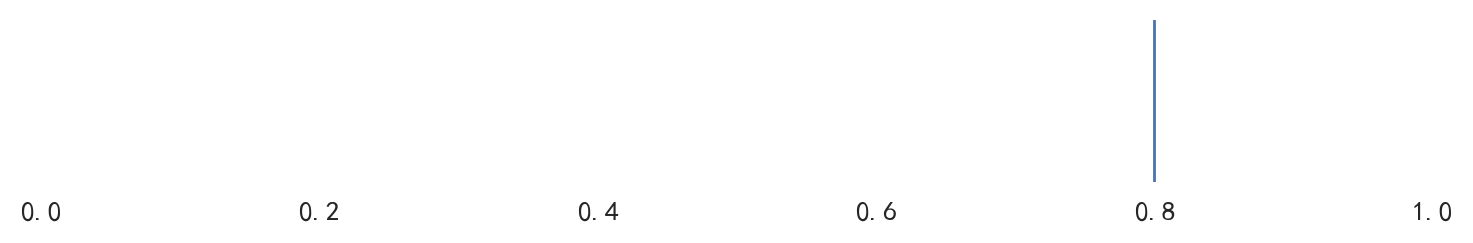

In [100]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus']=False
# 设置中文字体和负号正常显示
# 画出 x=2 这条垂直线
# plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

fig,ax = plt.subplots(figsize=(8,1),dpi=200,facecolor='white',edgecolor='black')
ax.set_facecolor('white')
plt.yticks([])
plt.axvline(0.8,linewidth=1)

In [15]:
import pandas as pd

In [17]:
df=pd.read_csv('allcityvector.csv')
df.head()

,Name,v0,v1,v2,v3,v4,v5,v6,v7,v8,...,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19
0,贵港市,-0.800627,0.281057,-0.463975,-0.212724,-0.526688,0.305239,0.660392,0.599828,0.386260,...,-0.386244,-0.455538,-0.219481,0.296923,0.696021,-0.145098,1.131165,-0.407248,0.360767,0.218720
1,文山壮族苗族自治州,0.567594,0.302449,-0.105324,0.381390,-0.960169,0.904984,0.543629,-0.267234,0.145285,...,-0.905053,-0.797731,-0.072509,0.676661,0.913856,-0.764136,-0.178289,-0.517570,0.690800,0.852651
2,中卫市,-0.579029,0.000568,0.070068,0.279233,0.083471,0.054558,0.034766,0.366009,0.085263,...,-0.495027,-0.366431,0.716739,0.279208,0.045721,-0.738383,0.011915,-0.118787,0.754634,-0.241602
3,韶关市,-0.591187,0.012866,-0.714250,-0.036122,-0.597183,0.499979,-0.256582,0.810495,0.852242,...,-0.013803,-0.237510,-0.095780,0.051303,0.194986,-0.142862,-0.414099,0.186182,0.248293,0.189738
4,池州市,-1.007705,-0.079841,0.207736,0.448570,-1.223251,-0.849147,0.716410,0.518088,0.462596,...,-0.567246,-0.652842,0.580364,0.170122,0.018892,0.223240,0.464075,-0.869124,-0.012799,0.600081


In [86]:
latlng=pd.read_csv('City Latitude and Longitude.csv')
latlng.head()

,Id,Label,lngs,lats
0,佳木斯市,佳木斯市,130.313202,46.797074
1,广安市,广安市,106.629209,30.458776
2,济宁市,济宁市,116.581709,35.414948
3,山南市,山南市,91.770987,29.240083
4,日喀则市,日喀则市,88.885170,29.272968


In [89]:
tf=pd.merge(df,latlng,left_on="Name",right_on='Id')
def get_location(lat):
    if lat>35:
        return 'N'
    else:
        return 'S'
tf['location']=tf.apply(lambda x:get_location(x['lats']),axis=1)
#  df.apply(lambda x: function1(row), axis=1)

# 最南的三亚市，最北的哈尔滨市
# 最上海市 陇南市 用水量
# 夜光遥感值 上海市 昌都市
# 政府预算上海市 日喀则市

In [125]:
sy=df[df['Name']=='三亚市'].values.tolist()[0][1:]
sh=df[df['Name']=='上海市'].values.tolist()[0][1:]
heb=df[df['Name']=='哈尔滨市'].values.tolist()[0][1:]
rkz=df[df['Name']=='日喀则市'].values.tolist()[0][1:]
cd=df[df['Name']=='昌都市'].values.tolist()[0][1:]
bj=df[df['Name']=='北京市'].values.tolist()[0][1:]
gz=df[df['Name']=='广州市'].values.tolist()[0][1:]
sz=df[df['Name']=='深圳市'].values.tolist()[0][1:]
cd=df[df['Name']=='成都市'].values.tolist()[0][1:]
hz=df[df['Name']=='杭州市'].values.tolist()[0][1:]

wh=df[df['Name']=='武汉市'].values.tolist()[0][1:]
cs=df[df['Name']=='长沙市'].values.tolist()[0][1:]

In [94]:
tf[tf['Name']==row[:].values.tolist()[0:1][0]]['location'].values[0]

'S'

In [27]:
from scipy import stats
import numpy as np

def get_pearson(a,b):
    a = np.array(a)
    b = np.array(b)
    s = stats.pearsonr(a, b)
    return s[0]

In [ ]:
texts = [plt.text(x[i], y[i], 'Text%s' %i) for i in range(len(x))]
adjust_text(texts,)

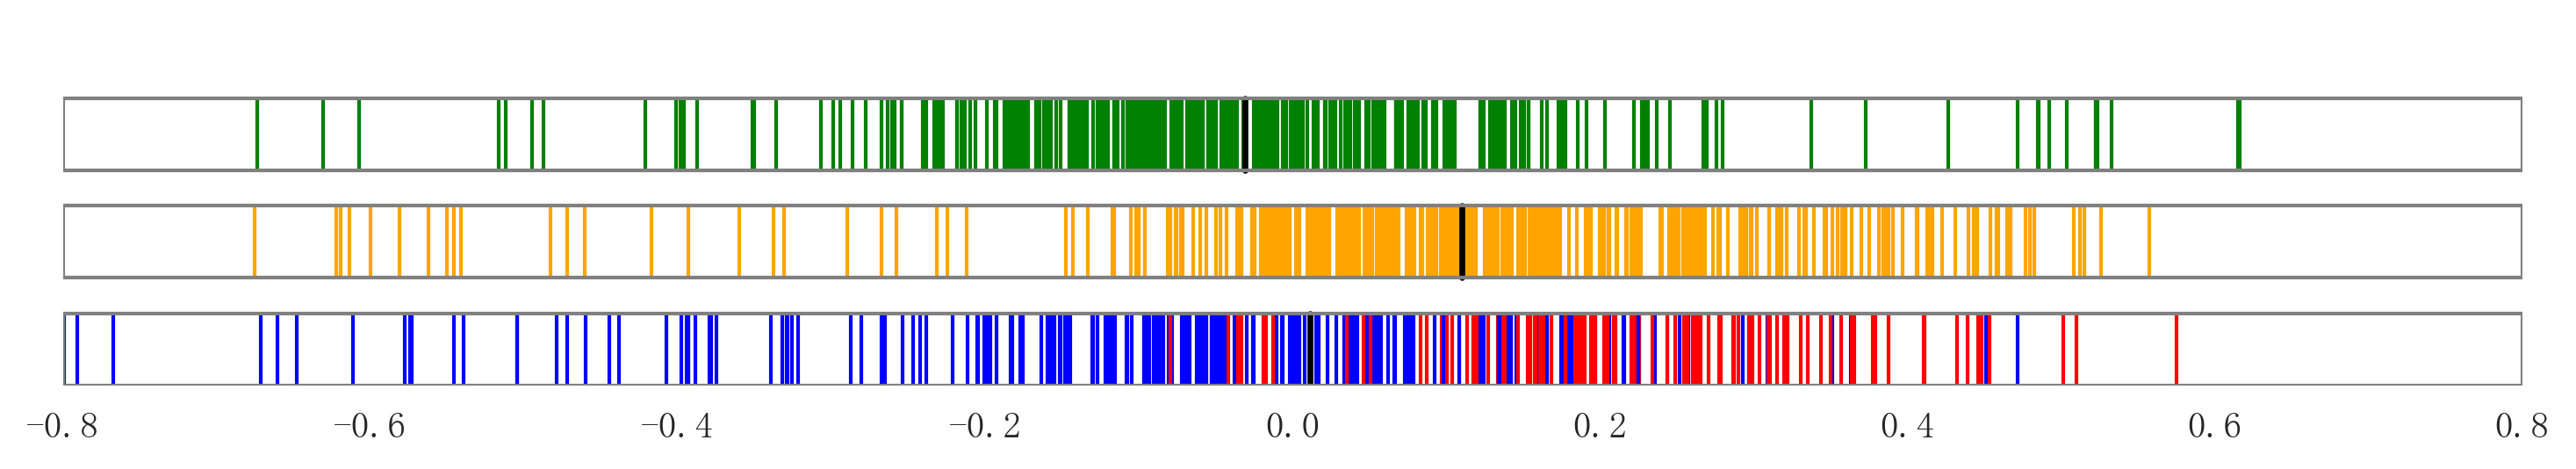

In [181]:
from pylab import mpl
import adjustText
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 10,2
fig,ax = plt.subplots(figsize=(10,2),dpi=300,facecolor='white',edgecolor='black')
ax.set_facecolor('white')
plt.yticks([])
textdata=[]

tmpsum=0
for index,row in df.iterrows():
#     print(row[:].values.tolist())
    localcity=row[:].values.tolist()[0:1][0]
    if localcity!='北京市' and localcity!='广州市':
        just=get_pearson(row[:].values.tolist()[1:],bj)
        negative=get_pearson(row[:].values.tolist()[1:],gz)
        tmpsum=tmpsum+just-negative
        if abs(just-negative)>0.5:
            textdata.append(row[:].values.tolist()+[just-negative])
        if localcity=='海口市':
            textdata.append(row[:].values.tolist()+[just-negative])
        if localcity=='大连市':
            textdata.append(row[:].values.tolist()+[just-negative])
        if localcity=='北京市':
            textdata.append(row[:].values.tolist()+[just-negative])
        try:
            if tf[tf['Name']==localcity]['location'].values[0]=='S':        
                plt.axvline(just-negative,linewidth=1,ymax=0.2,color='blue',linestyle='-')
            else:
                plt.axvline(just-negative,linewidth=1,ymax=0.2,color='red',linestyle='-')
        except:
#             print(localcity)
            pass
#             plt.axvline(just-negative,linewidth=1,ymax=0.2,color='gray',linestyle='-')

plt.axvline(tmpsum/(df.shape[0]-2),linewidth=1.6,ymin=0.0,ymax=0.2,color='black',linestyle='-')

plt.axvline(-0.7999,linewidth=1,ymin=0.0,ymax=0.2,color='gray',linestyle='-')#纵轴
plt.axvline(0.7999,linewidth=1,ymin=0.0,ymax=0.2,color='gray',linestyle='-')#纵轴
plt.axhline(0.0,linewidth=1,xmin=-1,xmax=1,color='gray',linestyle='-')#横轴
plt.axhline(0.2,linewidth=1,xmin=-1,xmax=1,color='gray',linestyle='-')#横轴

tmpsum=0
for index,row in df.iterrows():
#     print(row[:].values.tolist())
    localcity=row[:].values.tolist()[0:1][0]
    if localcity!='上海市' and localcity!='成都市':
        just=get_pearson(row[:].values.tolist()[1:],sh)
        negative=get_pearson(row[:].values.tolist()[1:],cd)
        
        plt.axvline(just-negative,linewidth=1,ymin=0.3,ymax=0.5,color='orange',linestyle='-')
        tmpsum=tmpsum+just-negative

plt.axvline(tmpsum/(df.shape[0]-2),linewidth=1.6,ymin=0.3,ymax=0.5,color='black',linestyle='-')

plt.axvline(-0.7999,linewidth=1,ymin=0.3,ymax=0.5,color='gray',linestyle='-')#纵轴
plt.axvline(0.7999,linewidth=1,ymin=0.3,ymax=0.5,color='gray',linestyle='-')#纵轴
plt.axhline(0.3,linewidth=1,xmin=-1,xmax=1,color='gray',linestyle='-')#横轴
plt.axhline(0.5,linewidth=1,xmin=-1,xmax=1,color='gray',linestyle='-')#横轴

tmpsum=0
for index,row in df.iterrows():
#     print(row[:].values.tolist())
    localcity=row[:].values.tolist()[0:1][0]
    if localcity!='武汉市' and localcity!='长沙市':
        just=get_pearson(row[:].values.tolist()[1:],wh)
        negative=get_pearson(row[:].values.tolist()[1:],cs)
        tmpsum=tmpsum+just-negative
        
        if abs(just-negative)>0.5:
            textdata.append(row[:].values.tolist()+[just-negative])
        if localcity=='海口市':
            textdata.append(row[:].values.tolist()+[just-negative])
        if localcity=='大连市':
            textdata.append(row[:].values.tolist()+[just-negative])
        if localcity=='北京市':
            textdata.append(row[:].values.tolist()+[just-negative])
        plt.axvline(just-negative,linewidth=1,ymin=0.6,ymax=0.8,color='green',linestyle='-')

plt.axvline(tmpsum/(df.shape[0]-2),linewidth=1.6,ymin=0.6,ymax=0.8,color='black',linestyle='-')
        
plt.axvline(-0.7999,linewidth=1,ymin=0.6,ymax=0.8,color='gray',linestyle='-')#纵轴
plt.axvline(0.7999,linewidth=1,ymin=0.6,ymax=0.8,color='gray',linestyle='-')#纵轴
plt.axhline(0.6,linewidth=1,xmin=-1,xmax=1,color='gray',linestyle='-')#横轴
plt.axhline(0.8,linewidth=1,xmin=-1,xmax=1,color='gray',linestyle='-')#横轴

# for index,row in df.iterrows():
# #     print(row[:].values.tolist())
#     localcity=row[:].values.tolist()[0:1][0]
#     if localcity!='广州市' and localcity!='深圳市':
#         just=get_pearson(row[:].values.tolist()[1:],gz)
#         negative=get_pearson(row[:].values.tolist()[1:],sz)
#         plt.axvline(just-negative,linewidth=1,ymin=0.9,ymax=1.1,color='green',linestyle='-')

# plt.axvline(-0.7999,linewidth=1,ymin=0.9,ymax=1.1,color='black',linestyle='-')#纵轴
# plt.axvline(0.7999,linewidth=1,ymin=0.9,ymax=1.1,color='black',linestyle='-')#纵轴
# plt.axhline(0.9,linewidth=1,xmin=-1,xmax=1,color='black',linestyle='-')#横轴
# plt.axhline(1.1,linewidth=1,xmin=-1,xmax=1,color='black',linestyle='-')#横轴
    
# plt.plot(x, y1, color='black',linestyle='-')

plt.xlim(-0.8, 0.8)   # 设置x轴的范围
plt.ylim(0, 1)

plt.tight_layout() #去除pdf周围白边
plt.savefig('东西bjgz.pdf')

In [187]:
tj=df[df['Name']=='天津市'].values.tolist()[0][1:]
nc=df[df['Name']=='南昌市'].values.tolist()[0][1:]
xn=df[df['Name']=='咸宁市'].values.tolist()[0][1:]

黄石市
----------
亳州市
----------
阜阳市
鄂州市


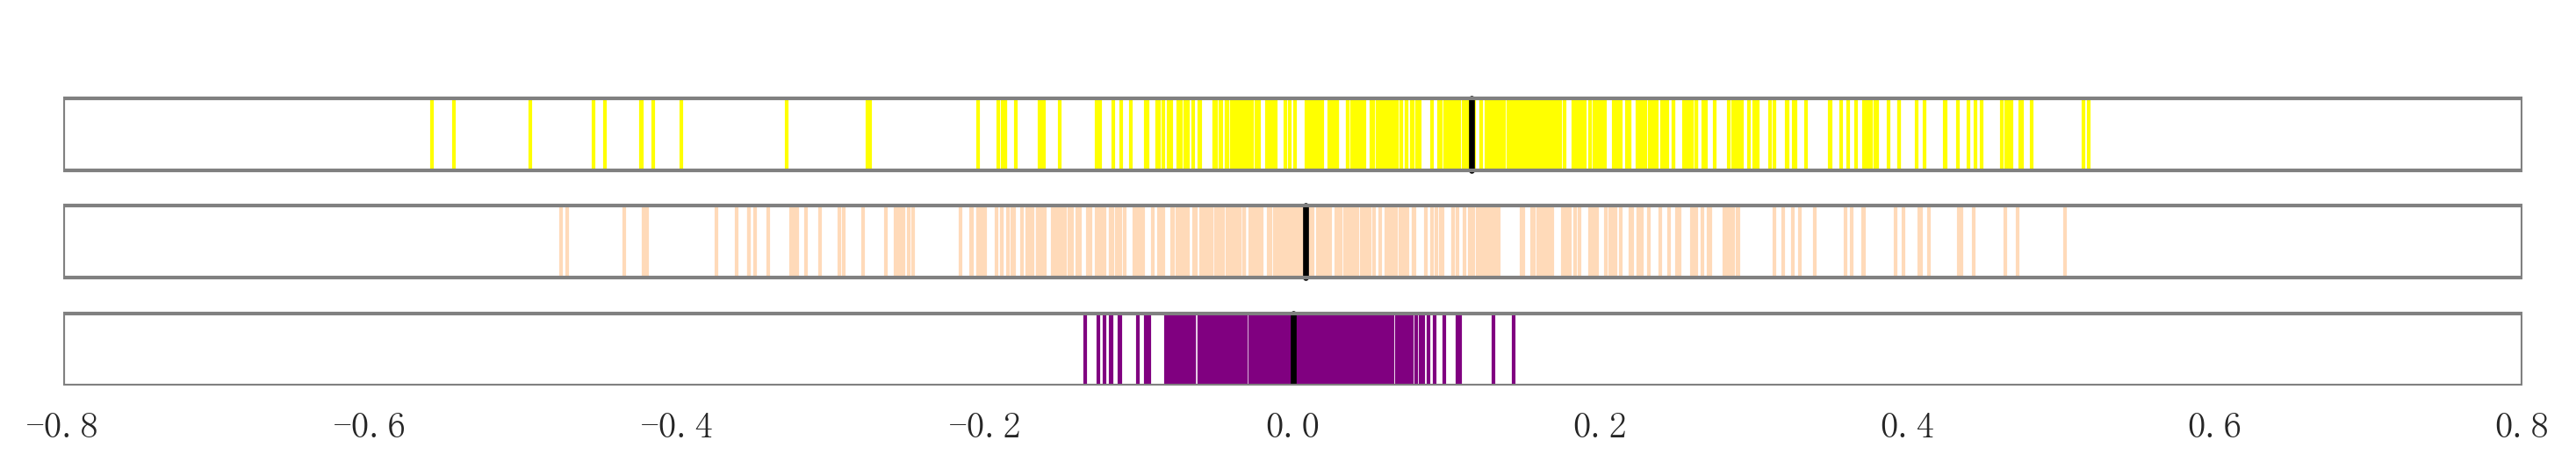

In [196]:
from pylab import mpl
import adjustText
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 10,2
fig,ax = plt.subplots(figsize=(10,2),dpi=300,facecolor='white',edgecolor='black')
ax.set_facecolor('white')
plt.yticks([])

#北京天津
tmpsum=0
for index,row in df.iterrows():
#     print(row[:].values.tolist())
    localcity=row[:].values.tolist()[0:1][0]
    
    just=get_pearson(row[:].values.tolist()[1:],gz)
    negative=get_pearson(row[:].values.tolist()[1:],sz)
    tmpsum=tmpsum+just-negative
      
    plt.axvline(just-negative,linewidth=1,ymax=0.2,color='purple',linestyle='-')

plt.axvline(tmpsum/(df.shape[0]-2),linewidth=1.6,ymin=0.0,ymax=0.2,color='black',linestyle='-')

plt.axvline(-0.7999,linewidth=1,ymin=0.0,ymax=0.2,color='gray',linestyle='-')#纵轴
plt.axvline(0.7999,linewidth=1,ymin=0.0,ymax=0.2,color='gray',linestyle='-')#纵轴
plt.axhline(0.0,linewidth=1,xmin=-1,xmax=1,color='gray',linestyle='-')#横轴
plt.axhline(0.2,linewidth=1,xmin=-1,xmax=1,color='gray',linestyle='-')#横轴

#武汉南昌
tmpsum=0
for index,row in df.iterrows():
#     print(row[:].values.tolist())
    localcity=row[:].values.tolist()[0:1][0]
    
    just=get_pearson(row[:].values.tolist()[1:],wh)
    negative=get_pearson(row[:].values.tolist()[1:],nc)
    tmpsum=tmpsum+just-negative
      
    plt.axvline(just-negative,linewidth=1,ymin=0.3,ymax=0.5,color='peachpuff',linestyle='-')


plt.axvline(tmpsum/(df.shape[0]-2),linewidth=1.6,ymin=0.3,ymax=0.5,color='black',linestyle='-')

plt.axvline(-0.7999,linewidth=1,ymin=0.3,ymax=0.5,color='gray',linestyle='-')#纵轴
plt.axvline(0.7999,linewidth=1,ymin=0.3,ymax=0.5,color='gray',linestyle='-')#纵轴
plt.axhline(0.3,linewidth=1,xmin=-1,xmax=1,color='gray',linestyle='-')#横轴
plt.axhline(0.5,linewidth=1,xmin=-1,xmax=1,color='gray',linestyle='-')#横轴

tmpsum=0
#广州深圳
for index,row in df.iterrows():
#     print(row[:].values.tolist())
    localcity=row[:].values.tolist()[0:1][0]
    
    just=get_pearson(row[:].values.tolist()[1:],sh)
    negative=get_pearson(row[:].values.tolist()[1:],wh)
    tmpsum=tmpsum+just-negative
      
    plt.axvline(just-negative,linewidth=1,ymin=0.6,ymax=0.8,color='yellow',linestyle='-')
    if just-negative >0.5:
        print('----------')
        print(localcity)
    elif just-negative <-0.5:
        print(localcity)

plt.axvline(tmpsum/(df.shape[0]-2),linewidth=1.6,ymin=0.6,ymax=0.8,color='black',linestyle='-')
        
plt.axvline(-0.7999,linewidth=1,ymin=0.6,ymax=0.8,color='gray',linestyle='-')#纵轴
plt.axvline(0.7999,linewidth=1,ymin=0.6,ymax=0.8,color='gray',linestyle='-')#纵轴
plt.axhline(0.6,linewidth=1,xmin=-1,xmax=1,color='gray',linestyle='-')#横轴
plt.axhline(0.8,linewidth=1,xmin=-1,xmax=1,color='gray',linestyle='-')#横轴

plt.xlim(-0.8, 0.8)   # 设置x轴的范围
plt.ylim(0, 1)

plt.tight_layout() #去除pdf周围白边
plt.savefig('第二幅.pdf')

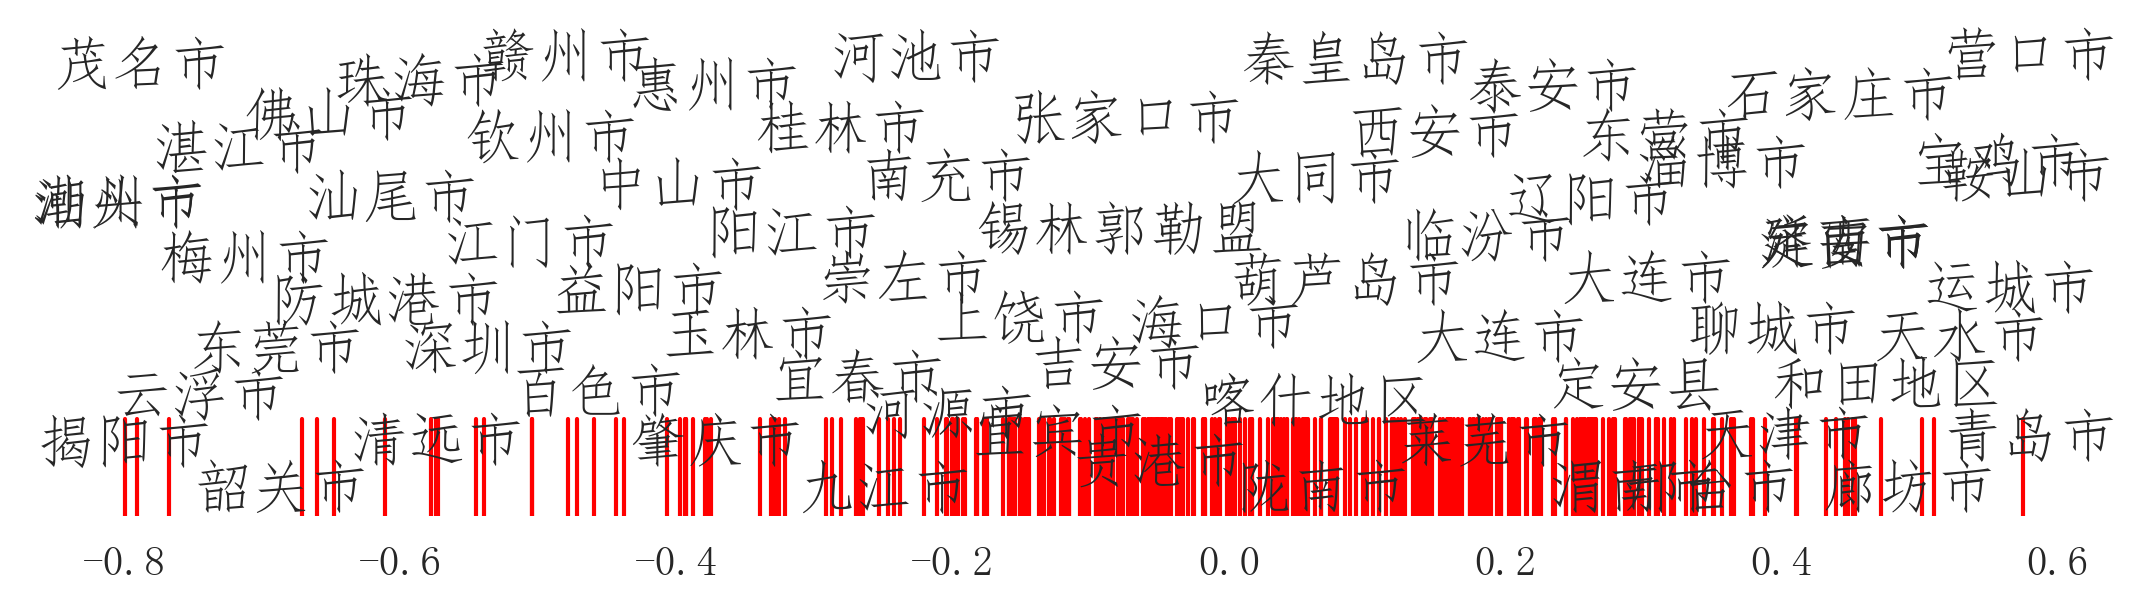

In [84]:
from pylab import mpl
import adjustText
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
fig,ax = plt.subplots(figsize=(8,2),dpi=300,facecolor='white',edgecolor='black')
ax.set_facecolor('white')
plt.yticks([])
textdata=[]
for index,row in df.iterrows():
#     print(row[:].values.tolist())
    if row[:].values.tolist()[0:1][0]!='广州市' and row[:].values.tolist()[0:1][0]!='北京市':
        just=get_pearson(row[:].values.tolist()[1:],bj)
        negative=get_pearson(row[:].values.tolist()[1:],gz)
        
        if abs(just-negative)>0.3:
            textdata.append(row[:].values.tolist()+[just-negative])
        if row[:].values.tolist()[0:1][0]=='海口市':
            textdata.append(row[:].values.tolist()+[just-negative])
        if row[:].values.tolist()[0:1][0]=='大连市':
            textdata.append(row[:].values.tolist()+[just-negative])
        if row[:].values.tolist()[0:1][0]=='北京市':
            textdata.append(row[:].values.tolist()+[just-negative])
        plt.axvline(just-negative,linewidth=1,ymax=0.2,color='red',linestyle='-')

texts = [plt.text(i[-1], -0.5, i[0], style = "italic") for i in textdata]
adjustText.adjust_text(texts,)
plt.savefig('北京广州.jpg')
# plt.text(just-negative,-0.5,row[:].values.tolist()[0:1][0],fontsize=12,color = "r", style = "italic", weight = "light")#, verticalalignment='center', horizontalalignment='right')#, rotation=0)

In [ ]:
label_list = ['NB', 'SVM', 'LSTM', 'COVN-LSTM', 'LSTM-GRU', 'LSTM-ATTENTION']    # 横坐标刻度显示值
num_list1 = [0.914, 0.961, 0.959, 0.967, 0.968, 0.970]      # 横坐标值1,Baseline
num_list2 = [0.902, 0.961, 0.959, 0.960, 0.966, 0.971]       # 横坐标值2,chi2
x = range(len(num_list1))
"""
绘制条形图
left:长条形中点横坐标
height:长条形高度
width:长条形宽度，默认值0.8
label:为后面设置legend准备
"""
width = 0.24
mid_width = 0.04
plt.grid(axis="y", c='gray', linestyle='-')
rects1 = plt.bar(x, num_list1, width=width, color='#5F95D3', label="ACC", zorder=4)  # 设置zorder可以让柱状图不被网格线挡在前面，数字越大优先级越高
rects2 = plt.bar([i + (width+mid_width) for i in x], num_list2, width=width, color='#BC524A', label="F1", zorder=4)
plt.ylim(0.0, 1)     # y轴取值范围
size = 18
# plt.xlabel('不同算法', size=size)
# plt.ylabel('Accuracy', size=size)
"""
设置x轴刻度显示值
参数一：中点坐标
参数二：显示值
"""
plt.xticks([i + (width+mid_width)/2 for i in x], label_list, size=size)
plt.yticks(np.linspace(0, 1, 6), ['0', '20', '40', '60', '80', '100'], size=size)
plt.title("各算法性能对比柱状图", size=size)
plt.legend(prop={'size': size}, bbox_to_anchor=(1, 1))     # 设置题注, bbox_to_anchor控制图例位置
# plt.savefig('base_chi2.png')
plt.show()